<a href="https://colab.research.google.com/github/heominho/2022_2_bigdata/blob/main/201844102%ED%97%88%EB%AF%BC%ED%98%B8_%EA%B8%B0%EB%A7%90%ED%94%84%EC%A0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import sys
import urllib.request
import datetime
import time
import json

client_id = '9zUiUt2jbTfWLIsghsHI'
client_secret = 'fyfJRtm5VY'




#[CODE 1]
def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   #[CODE 1]
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):    
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    
    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    
    jsonResult.append({'cnt':cnt, 'title':title, 'description': description, 
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return    

#[CODE 0]
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']
 
    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):         
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  #[CODE 3]       
        
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]
       
    print('전체 검색 : %d 건' %total)
    
    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)
                        
        outfile.write(jsonFile)
        
    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))
    
if __name__ == '__main__':
    main()


검색어를 입력하세요: 교통사고
[2022-12-11 04:16:03.891987] Url Request Success
[2022-12-11 04:16:05.111027] Url Request Success
[2022-12-11 04:16:06.356013] Url Request Success
[2022-12-11 04:16:07.597206] Url Request Success
[2022-12-11 04:16:08.886607] Url Request Success
[2022-12-11 04:16:10.166494] Url Request Success
[2022-12-11 04:16:11.404611] Url Request Success
[2022-12-11 04:16:12.662556] Url Request Success
[2022-12-11 04:16:13.939702] Url Request Success
[2022-12-11 04:16:15.230992] Url Request Success
HTTP Error 400: Bad Request
[2022-12-11 04:16:16.152808] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0&start=1001&display=100
전체 검색 : 1061309 건
가져온 데이터 : 1000 건
교통사고_naver_news.json SAVED


In [3]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
#  폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [1,073 kB]
Hit:1

In [3]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [4]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [5]:
inputFileName = '/content/교통사고_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

[{'cnt': 1,
  'description': '민주당 &quot;3년 연장은 정부가 국민 앞에 한 약속&quot; 국토부 &quot;집단 운송거부 엄청난 피해…재검토&quot; 정우택 &quot;<b>교통사고</b> 증가…근본적 해결방안 필요&quot; ［충북일보］ &apos;안전운임제&apos;를 오는 2025년까지 3년 연장하는 &apos;화물자동차... ',
  'link': 'https://www.inews365.com/news/article.html?no=743446',
  'org_link': 'https://www.inews365.com/news/article.html?no=743446',
  'pDate': '2022-12-11 13:12:00',
  'title': '&apos;안전운임제 3년 연장&apos; 야당 단독 상임위 통과'},
 {'cnt': 2,
  'description': '한편, 1951년 광양읍 우산리에서 출생한 이균영 작가는 소설가이자 역사학자로서 다양한\xa0집필활동을 펼치며 천재 작가로 비상한 관심을 끌었으나\xa01996년 불의의 <b>교통사고</b>로\xa045세에\xa0타계하며 안타까움을 남겼다. 이균영은... ',
  'link': 'http://www.shinailbo.co.kr/news/articleView.html?idxno=1634958',
  'org_link': 'http://www.shinailbo.co.kr/news/articleView.html?idxno=1634958',
  'pDate': '2022-12-11 13:12:00',
  'title': '광양시, 故 이균영 작가 문학비 제막식 성료'},
 {'cnt': 3,
  'description': '<b>교통사고</b>의 위험으로부터 어린이를 보호하기 위해서다. 현재 인천의 어린이보호구역은 693곳이다. 이 장소들의 공통점은 모두 횡단보도는 설치됐지만, 신호기가 부재했다는 사실이다. 이에 주민들은 길 건너기가 한층... ',
  'l

In [6]:
message = ''

for item in data:
#    if 'message' in item.keys(): 
#        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
    if 'description' in item.keys(): 
        message = message + re.sub(r'[^\w]', ' ', item['description']) +''
        
message #출력하여 내용 확인

'민주당  quot 3년 연장은 정부가 국민 앞에 한 약속 quot  국토부  quot 집단 운송거부 엄청난 피해 재검토 quot  정우택  quot  b 교통사고  b  증가 근본적 해결방안 필요 quot   충북일보   apos 안전운임제 apos 를 오는 2025년까지 3년 연장하는  apos 화물자동차    한편  1951년 광양읍 우산리에서 출생한 이균영 작가는 소설가이자 역사학자로서 다양한 집필활동을 펼치며 천재 작가로 비상한 관심을 끌었으나 1996년 불의의  b 교통사고  b 로 45세에 타계하며 안타까움을 남겼다  이균영은     b 교통사고  b 의 위험으로부터 어린이를 보호하기 위해서다  현재 인천의 어린이보호구역은 693곳이다  이 장소들의 공통점은 모두 횡단보도는 설치됐지만  신호기가 부재했다는 사실이다  이에 주민들은 길 건너기가 한층    경남 의령군은 오는 15일 오후 7시 군민문화회관에서  b 교통사고  b  분석 전문가 한문철 변호사를 초청  apos 군민 아카데미 apos 를 개최한다고 밝혔다  한문철 변호사는  apos  b 교통사고  b  안 내고 안 당하기 apos 라는 주제로  b 교통  b  법규에 관해    지난달 29일 양산시 북부동에서는 차대차  b 교통사고  b 가 발생해 도민이 위험에 처했으나  출근길  b 사고  b 를 목격한 새내기 소방관이 자기 차에 있던 차량용 소화기로 화재를 진압해 운전자를 구조한 사건이 있었다  이처럼    한편  현대차는 지난해 11월에도 카마스터들과 함께 매칭 그랜트 방식으로  b 교통사고  b  유자녀를 돕기 위한 2000만원의 기금을 조성해 한국 b 교통  b 안전공단에 전달한 바 있다 현대차는 지난해 11월에도 카마스터들과 함께 매칭 그랜트 방식으로  b 교통사고  b  유자녀를 돕기 위한 2천만원의 기금을 조성해 한국 b 교통  b 안전공단에 전달한 바 있다  현대차 관계자는  quot 작년에 이어 올해에도 적립된 후원금을    공휴일 및 주중 야간의 취약시간에 동물사체 

In [7]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

['민주당',
 '연장',
 '정부',
 '국민',
 '앞',
 '약속',
 '국토부',
 '집단',
 '운송',
 '거부',
 '피해',
 '재',
 '검토',
 '정우택',
 '교통사고',
 '증가',
 '근본',
 '해결',
 '방안',
 '필요',
 '충북',
 '일보',
 '안전',
 '운임',
 '제',
 '를',
 '연장',
 '화물자동차',
 '한편',
 '광양읍',
 '우산',
 '리',
 '출생',
 '이균영',
 '작가',
 '소설가',
 '이자',
 '역사학자',
 '로서',
 '집필',
 '활동',
 '천재',
 '작가',
 '관심',
 '불의',
 '교통사고',
 '로',
 '세',
 '타계',
 '움',
 '이균영',
 '교통사고',
 '의',
 '위험',
 '어린이',
 '보호',
 '위',
 '현재',
 '인천',
 '어린이',
 '보호',
 '구역',
 '곳',
 '이',
 '장소',
 '공통점',
 '모두',
 '횡단보도',
 '설치',
 '호기',
 '부재',
 '사실',
 '이',
 '주민',
 '길',
 '한층',
 '경남',
 '의령군',
 '오후',
 '군민',
 '문화',
 '회관',
 '교통사고',
 '분석',
 '전문가',
 '철',
 '변호사',
 '초청',
 '군민',
 '아카데미',
 '를',
 '개최',
 '철',
 '변호사',
 '교통사고',
 '안',
 '안',
 '주제',
 '교통',
 '법규',
 '관해',
 '지난달',
 '양산시',
 '북',
 '부동',
 '차',
 '대차',
 '교통사고',
 '발생',
 '도민',
 '위험',
 '처',
 '출근길',
 '사고',
 '를',
 '목격',
 '새내기',
 '소방관',
 '자기',
 '차',
 '차량',
 '용',
 '소화기',
 '화재',
 '진압해',
 '운전자',
 '구조',
 '사건',
 '이처럼',
 '한편',
 '현대차',
 '지난해',
 '카',
 '마스터',
 '매칭',
 '그랜트',
 '방식',
 '교통사고',
 '유자녀',
 '

In [8]:
count = Counter(message_N)

count   #출력하여 내용 확인

Counter({'민주당': 4,
         '연장': 3,
         '정부': 27,
         '국민': 4,
         '앞': 27,
         '약속': 1,
         '국토부': 7,
         '집단': 2,
         '운송': 8,
         '거부': 1,
         '피해': 34,
         '재': 4,
         '검토': 3,
         '정우택': 5,
         '교통사고': 1092,
         '증가': 21,
         '근본': 1,
         '해결': 6,
         '방안': 4,
         '필요': 3,
         '충북': 16,
         '일보': 4,
         '안전': 225,
         '운임': 25,
         '제': 39,
         '를': 233,
         '화물자동차': 4,
         '한편': 41,
         '광양읍': 6,
         '우산': 7,
         '리': 7,
         '출생': 5,
         '이균영': 11,
         '작가': 13,
         '소설가': 5,
         '이자': 13,
         '역사학자': 5,
         '로서': 6,
         '집필': 5,
         '활동': 33,
         '천재': 5,
         '관심': 6,
         '불의': 10,
         '로': 125,
         '세': 31,
         '타계': 6,
         '움': 18,
         '의': 97,
         '위험': 55,
         '어린이': 105,
         '보호': 60,
         '위': 109,
         '현재': 10,
         '

In [10]:
word_count = dict()

#for tag, counts in count.most_common(80):
for tag, counts in count.most_common(70):  
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

교통사고 : 1092
사고 : 337
교통 : 333
발생 : 246
안전 : 225
도로 : 220
차량 : 174
위해 : 148
설치 : 142
예방 : 132
운전자 : 127
경찰 : 112
어린이 : 105
훈련 : 104
상황 : 102
지난 : 98
공단 : 93
보행자 : 93
소방 : 88
지역 : 85
한국 : 84
개선 : 82
결빙 : 82
대형 : 78
이번 : 77
야간 : 76
경기도 : 74
오전 : 69
진행 : 68
가정 : 65
사망 : 62
지난해 : 61
참여 : 61
이동 : 61
보호 : 60
진도 : 58
주의 : 58
올해 : 57
버스 : 57
횡단보도 : 56
위험 : 55
구역 : 54
에스컬레이터 : 54
방송 : 53
시민 : 53
승용차 : 52
자동차 : 51


In [11]:
print(word_count)

{'교통사고': 1092, '사고': 337, '교통': 333, '발생': 246, '안전': 225, '도로': 220, '차량': 174, '위해': 148, '설치': 142, '예방': 132, '운전자': 127, '경찰': 112, '어린이': 105, '훈련': 104, '상황': 102, '지난': 98, '공단': 93, '보행자': 93, '소방': 88, '지역': 85, '한국': 84, '개선': 82, '결빙': 82, '대형': 78, '이번': 77, '야간': 76, '경기도': 74, '오전': 69, '진행': 68, '가정': 65, '사망': 62, '지난해': 61, '참여': 61, '이동': 61, '보호': 60, '진도': 58, '주의': 58, '올해': 57, '버스': 57, '횡단보도': 56, '위험': 55, '구역': 54, '에스컬레이터': 54, '방송': 53, '시민': 53, '승용차': 52, '자동차': 51}


In [12]:
del word_count['위해']
del word_count['이번']
del word_count['지난']
del word_count['교통사고']
del word_count['교통']
del word_count['사고']


In [13]:
print(word_count)

{'발생': 246, '안전': 225, '도로': 220, '차량': 174, '설치': 142, '예방': 132, '운전자': 127, '경찰': 112, '어린이': 105, '훈련': 104, '상황': 102, '공단': 93, '보행자': 93, '소방': 88, '지역': 85, '한국': 84, '개선': 82, '결빙': 82, '대형': 78, '야간': 76, '경기도': 74, '오전': 69, '진행': 68, '가정': 65, '사망': 62, '지난해': 61, '참여': 61, '이동': 61, '보호': 60, '진도': 58, '주의': 58, '올해': 57, '버스': 57, '횡단보도': 56, '위험': 55, '구역': 54, '에스컬레이터': 54, '방송': 53, '시민': 53, '승용차': 52, '자동차': 51}


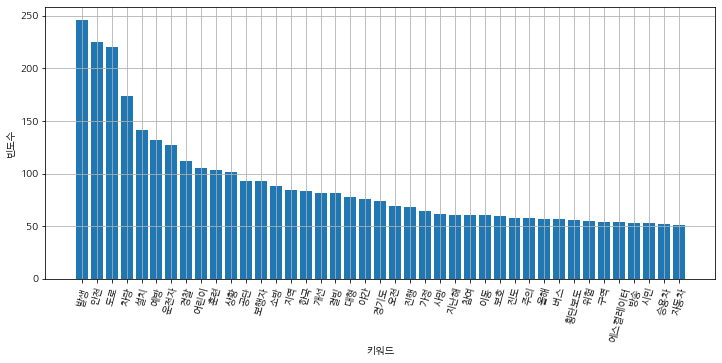

In [14]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

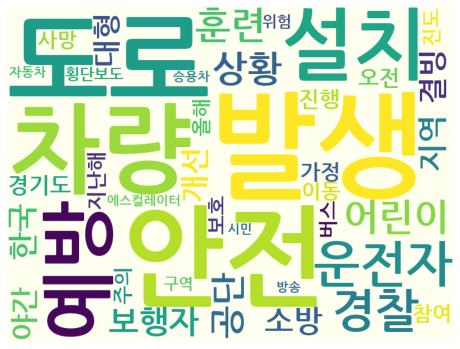

In [15]:
wc = WordCloud(path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [16]:
cloud.to_file(inputFileName + '_cloud.jpg')

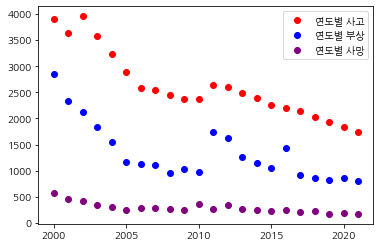

In [18]:
import pandas as pd
tong = pd.read_csv('/content/한국도로공사_교통사고통계_20211231.csv', encoding="EUC-KR")
tong.head()


plt.scatter(tong['연도'], tong['사고'], color='red', label='연도별 사고')


plt.scatter(tong['연도'], tong['부상'], color='blue', label='연도별 부상')


plt.scatter(tong['연도'], tong['사망'], color='purple', label='연도별 사망')
plt.legend()
plt.show()

In [20]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf

df = pd.read_csv("/content/도로교통공단_사망 교통사고 정보_20211231.csv", encoding="EUC-KR")
df2 = pd.read_csv("/content/도로교통공단_도로종류별 기상상태별 교통사고 통계_20211231.csv", encoding="EUC-KR")

df.info() #데이터 정보 파악
df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   발생년          2816 non-null   int64  
 1   발생년월일시       2816 non-null   object 
 2   주야           2816 non-null   object 
 3   요일           2816 non-null   object 
 4   사망자수         2816 non-null   int64  
 5   부상자수         2816 non-null   int64  
 6   중상자수         2816 non-null   int64  
 7   경상자수         2816 non-null   int64  
 8   부상신고자수       2816 non-null   int64  
 9   발생지시도        2816 non-null   object 
 10  발생지시군구       2816 non-null   object 
 11  사고유형_대분류     2816 non-null   object 
 12  사고유형_중분류     2816 non-null   object 
 13  사고유형         2816 non-null   object 
 14  가해자법규위반      2816 non-null   object 
 15  도로형태_대분류     2816 non-null   object 
 16  도로형태         2816 non-null   object 
 17  가해자_당사자종별    2816 non-null   object 
 18  피해자_당사자종별    2816 non-null   object 
 19  발생위치X(

In [ ]:
df.head()


,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327


In [ ]:
df2.head()

,도로종류,기상상태,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,일반국도,맑음,16479,427,4985,19509,1354
1,일반국도,흐림,796,33,258,874,81
2,일반국도,비,1326,49,433,1573,93
3,일반국도,안개,43,6,22,37,0
4,일반국도,눈,165,4,48,221,20


In [23]:
sunny_df = df2[df2['기상상태'] =='맑음']

cloud_df = df2[df2['기상상태'] =='흐림']

rain_df = df2[df2['기상상태'] =='비']

angae_df = df2[df2['기상상태'] =='안개']

snow_df = df2[df2['기상상태'] =='눈']

guitar_df = df2[df2['기상상태'] =='기타/불명']

print('기상상태가 맑음일때의 사고건수 :' + str(sunny_df['사고건수'].sum()))
print('기상상태가 흐림일때의 사고건수 :' + str(cloud_df['사고건수'].sum()))
print('기상상태가 비일때의 사고건수 :' + str(rain_df['사고건수'].sum()))
print('기상상태가 안개일때의 사고건수 :' + str(angae_df['사고건수'].sum()))
print('기상상태가 눈일때의 사고건수 :' + str(snow_df['사고건수'].sum()))
print('기상상태가 기타/불명일때의 사고건수 :' + str(guitar_df['사고건수'].sum()))
print()

print('기상상태가 맑음일때의 사망자수 :' + str(sunny_df['사망자수'].sum()))
print('기상상태가 흐림일때의 사망자수 :' + str(cloud_df['사망자수'].sum()))
print('기상상태가 비일때의 사망자수 :' + str(rain_df['사망자수'].sum()))
print('기상상태가 안개일때의 사망자수 :' + str(angae_df['사망자수'].sum()))
print('기상상태가 눈일때의 사망자수 :' + str(snow_df['사망자수'].sum()))
print('기상상태가 기타/불명일때의 사망자수 :' + str(guitar_df['사망자수'].sum()))
print()

print('기상상태가 맑음일때의 중상자수 :' + str(sunny_df['중상자수'].sum()))
print('기상상태가 흐림일때의 중상자수 :' + str(cloud_df['중상자수'].sum()))
print('기상상태가 비일때의 중상자수 :' + str(rain_df['중상자수'].sum()))
print('기상상태가 안개일때의 중상자수 :' + str(angae_df['중상자수'].sum()))
print('기상상태가 눈일때의 중상자수 :' + str(snow_df['중상자수'].sum()))
print('기상상태가 기타/불명일때의 중상자수 :' + str(guitar_df['중상자수'].sum()))
print()

print('기상상태가 맑음일때의 경상자수 :' + str(sunny_df['경상자수'].sum()))
print('기상상태가 흐림일때의 경상자수 :' + str(cloud_df['경상자수'].sum()))
print('기상상태가 비일때의 경상자수 :' + str(rain_df['경상자수'].sum()))
print('기상상태가 안개일때의 경상자수 :' + str(angae_df['경상자수'].sum()))
print('기상상태가 눈일때의 경상자수 :' + str(snow_df['경상자수'].sum()))
print('기상상태가 기타/불명일때의 경상자수 :' + str(guitar_df['경상자수'].sum()))


기상상태가 맑음일때의 사고건수 :178913
기상상태가 흐림일때의 사고건수 :6982
기상상태가 비일때의 사고건수 :13373
기상상태가 안개일때의 사고건수 :207
기상상태가 눈일때의 사고건수 :1395
기상상태가 기타/불명일때의 사고건수 :2260

기상상태가 맑음일때의 사망자수 :2372
기상상태가 흐림일때의 사망자수 :197
기상상태가 비일때의 사망자수 :267
기상상태가 안개일때의 사망자수 :22
기상상태가 눈일때의 사망자수 :23
기상상태가 기타/불명일때의 사망자수 :35

기상상태가 맑음일때의 중상자수 :49072
기상상태가 흐림일때의 중상자수 :2062
기상상태가 비일때의 중상자수 :3786
기상상태가 안개일때의 중상자수 :92
기상상태가 눈일때의 중상자수 :320
기상상태가 기타/불명일때의 중상자수 :573

기상상태가 맑음일때의 경상자수 :193050
기상상태가 흐림일때의 경상자수 :7171
기상상태가 비일때의 경상자수 :14731
기상상태가 안개일때의 경상자수 :186
기상상태가 눈일때의 경상자수 :1778
기상상태가 기타/불명일때의 경상자수 :2367


In [ ]:
fig = px.bar(df2, x='기상상태', y='사고건수', color='기상상태')
fig.show()
#맑음 - 비 - 흐림 - 기타/불명 - 눈 - 안개 순으로 교통사고
fig = px.bar(df2, x='기상상태', y='사망자수', color='기상상태')
fig.show()

In [ ]:
df = df.astype({'발생년월일시':'string'}) # 시간만 slicing 을 위해 발생년월일시를 string 형식으로 형  변환환 
df['발생시간'] = df['발생년월일시'].str[11:13] # 시간 부분을 슬라이싱

df = df.astype({'발생시간':'int64'})  # 아래 날짜별 시간별 사망 교통사고 현황 scatter로 표현하기 위해 int64로 변환

df.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도,발생시간
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653,3
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845,9
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842,15
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391,19
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327,21


In [ ]:
#날짜별 / 시간별 사망 교통사고 현황
fig = px.scatter(df, x='발생년월일시', y='발생시간', color='발생지시도',size='사망자수')
fig.show()

In [ ]:
#시간대별 교통사고 사망자 현황

fig = px.bar(df, x='사망자수', y='발생시간', orientation='h' ,color='발생시간')
fig.show()

#시, 도 별 교통사고 사망자 현황
fig = px.bar(df, x='사망자수', y='발생지시도', orientation='h', color='발생지시도')
fig.show()

#요일별 교통사고 사망자 현황
fig = px.bar(df, x='사망자수', y='요일', orientation='h', color='요일')
fig.show()

#사고유형 별  교통사고 사망자 현황
fig = px.bar(df, x='사망자수', y='사고유형', orientation='h', color='사고유형')
fig.show()

#주야 별  교통사고 사망자 현황
fig = px.bar(df, x='사망자수', y='주야', orientation='h', color='주야')
fig.show()

#도로형태 별  교통사고 사망자 현황
fig = px.bar(df, x='사망자수', y='도로형태', orientation='h', color='도로형태')
fig.show()

In [ ]:
#시간대별 교통사고 부상자 현황
fig = px.bar(df, x='부상자수', y='발생시간', orientation='h',color='발생시간')
fig.show()

#시, 도 별 교통사고 부상자 현황
fig = px.bar(df, x='부상자수', y='발생지시도', orientation='h' , color='발생지시도')
fig.show()

#요일별 교통사고 부상상자 현황
fig = px.bar(df, x='부상자수', y='요일', orientation='h', color='요일')
fig.show()

#사고유형별 교통사고 부상상자 현황
fig = px.bar(df, x='부상자수', y='사고유형', orientation='h' , color='사고유형')
fig.show()

#주야 별  교통사고 부상자 현황
fig = px.bar(df, x='부상자수', y='주야', orientation='h', color='주야')
fig.show()

#도로형태 별  교통사고 부상자 현황
fig = px.bar(df, x='부상자수', y='도로형태', orientation='h', color='도로형태')
fig.show()

In [26]:
#경기도 사망자수 부상자수 Folium통한 지도 시각화
G_df = df[df['발생지시도'] =='경기']

import folium
map =  folium.Map(location=[37.5502,126.982],  zoom_start=10)


for n in G_df.index:
  # CircleMarker 사이즈 계산
  cnt1 = G_df['사망자수'][n]
  cnt2 = G_df['부상자수'][n]
  cnt = cnt1+cnt2
  folium.CircleMarker([G_df['위도'][n],G_df['경도'][n]], popup='<pre>'+G_df['사고유형'][n]+', 사망자 '+str(int(cnt1))+'명, '+'부상자 '+ str(int(cnt2))+'명'+'</pre>',
                      radius=10, color='steelblue', fill=True,fill_color='lightblue', fill_opacity=0.7).add_to(map)



map

In [ ]:
#서울 사망자수 부상자수 Folium통한 지도 시각화
S_df = df[df['발생지시도'] =='서울']


import folium
Smap = folium.Map(location=[37.55, 126.98], zoom_start = 12)


for n in S_df.index:
  # CircleMarker 사이즈 계산
  cnt1 = S_df['사망자수'][n]
  cnt2 = S_df['부상자수'][n]
  cnt = cnt1+cnt2
  folium.CircleMarker([S_df['위도'][n],S_df['경도'][n]], popup='<pre>'+S_df['사고유형'][n]+', 사망자 '+str(int(cnt1))+'명, '+'부상자 '+ str(int(cnt2))+'명'+'</pre>',
                      radius=10, color='steelblue', fill=True,fill_color='lightblue', fill_opacity=0.7).add_to(Smap)
Smap